In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [2]:
filepath = './dataFolder/TrackingData_2022_11_10/x_y_ordered_polyFit/'

p_fit_files = glob.glob(filepath + '*.npy')
X_arr_files = glob.glob(filepath + '*x*.csv')
Y_arr_files = glob.glob(filepath + '*y*.csv')

filepath_another = './dataFolder/TrackingData_2022_11_10/proboscisVector/'
prob_vect_files = glob.glob(filepath_another + '*ProboscisVector.csv')

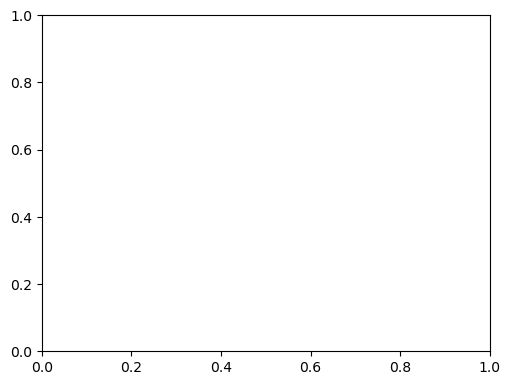

In [4]:
# save images in folder
image_folder = './dataFolder/TrackingData_2022_11_10/proboscisVector/'
f = plt.figure()
ax = f.add_axes([0.3, 0.3, 0.7, 0.7])

for f in prob_vect_files[0:1]:
    prob_vect = pd.read_csv(f, index_col=0)
    
    mothID = f.split('\\')[-1][:-21]
    
    X_arr = pd.read_csv([file for file in X_arr_files if mothID in file][0], index_col=0)
    Y_arr = pd.read_csv([file for file in Y_arr_files if mothID in file][0], index_col=0)
    p_fit = np.load([file for file in p_fit_files if mothID in file][0])
    
    # create a directory to keep the images
    directory_name = image_folder + mothID + '/'
    os.makedirs(directory_name, exist_ok=True)
    
    for ii, _ in Y_arr.iterrows():
        testy = Y_arr.loc[ii,:].values
        testx = X_arr.loc[ii,:].values
        
        testx_prob_vect = prob_vect.loc[ii,['x1', 'x2']]
        testy_prob_vect = prob_vect.loc[ii,['y1', 'y2']]
        
        p = np.poly1d(p_fit[ii])
        
        ax.plot(testx, testy, 'o')
        ax.plot(p(testy), testy, 'r-')
        plt.plot(testx_prob_vect, testy_prob_vect, 'k-')

        start_arrow = (testx_prob_vect[0], testy_prob_vect[0])
        end_arrow = (testx_prob_vect[1], testy_prob_vect[1])
            
        ax.annotate("", xytext=start_arrow, xy=end_arrow,
            arrowprops=dict(arrowstyle="->",
                            color='black',      # Arrow color
                            lw=1.5,           # Line width of the arrow shaft
                            mutation_scale=15 # Scale of the arrowhead
                           ))
        
        figname = str(ii).zfill(4) + '.png'
        plt.savefig(directory_name + figname)
        plt.cla()

In [ ]:
# pull up the polyfit variables and x, y positions
# p_fit = np.load('./dataFolder/3DpolyfitVariables.npy') #load the coefficients of the polyfit
# X_arr = pd.read_csv('./dataFolder/x_proboscis_ordered')
# X_arr = X_arr.drop(['Unnamed: 0'], axis=1)
# Y_arr = pd.read_csv('./dataFolder/y_proboscis_ordered')
# Y_arr = Y_arr.drop(['Unnamed: 0'], axis=1)

In [ ]:

# tang_x = []
# tang_y = []

# for ii, _ in Y_arr.iterrows():
#     testy = Y_arr.loc[ii,:].values
#     testx = X_arr.loc[ii,:].values
#     p = np.poly1d(p_fit[ii])
    
#     # get the slope of tangent at the base, slope of tangent == derivative at base
#     der_p = p.deriv()
#     der_poly1d = np.poly1d(der_p)

#     slope_tang = der_poly1d(testy[0]) 
#     #note that the for the fit, the axes are reversed and hence the x axis for the fit evalulation is the testy 
    
#     #get coordinates for the tangent
#     tangent_x, tangent_y = CreateTangentProbBase(slope_tang, testy, p)
#     tang_x.append(tangent_x)
#     tang_y.append(tangent_y)
    
# #     plt.plot(testx, testy, 'o')
# #     plt.plot(p(testy), testy, 'or-')
# #     plt.plot(tangent_x, tangent_y, 'ok-')
# #     figname = str(ii).zfill(4) + '.png'
# #     plt.savefig(folder + figname)

# #     plt.cla()
# tangent = pd.DataFrame({'x': tang_x, 'y':tang_y})
# x = pd.DataFrame(tangent['x'].to_list(), columns = ['x1', 'x2'])
# y = pd.DataFrame(tangent['y'].to_list(), columns = ['y1', 'y2'])
# df = pd.concat([x, y], axis=1)
# df.to_csv('./dataFolder/ProboscisVector.csv')